In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_moons
from sklearn.datasets.samples_generator import make_blobs
from cdbw.cdbw import CDbw

Automatically created module for IPython interactive environment


Estimated number of clusters: 3
Homogeneity: 0.860
Completeness: 0.700
V-measure: 0.772
Adjusted Rand Index: 0.779
Adjusted Mutual Information: 0.699
Silhouette Coefficient: 0.522
Calinski-Harabaz Coefficient: 669.883
1.1891950277457906
CDbw score (comb): 0.194
0.3789883624659618
CDbw score (bind): 0.032
0.31543638238238625
CDbw score (sep): 0.144
0.31543638238238625
CDbw score (filter) : 0.144


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

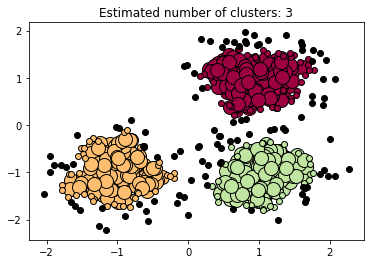

In [2]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("Calinski-Harabaz Coefficient: %0.3f"
      % metrics.calinski_harabaz_score(X, labels))
print("CDbw score (comb): %0.3f"
      % CDbw(X, labels, alg_noise='comb'))
print("CDbw score (bind): %0.3f"
      % CDbw(X, labels, alg_noise='bind'))
print("CDbw score (sep): %0.3f"
      % CDbw(X, labels, alg_noise='sep'))
print("CDbw score (filter) : %0.3f"
      % CDbw(X, labels, alg_noise='filter'))

# #############################################################################
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt

Estimated number of clusters: 3
Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650
Calinski-Harabaz Coefficient: 2264.525
0.3793971107911331
CDbw score: 0.040


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

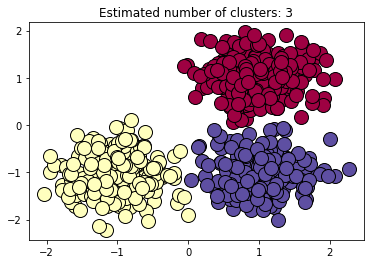

In [3]:
# #############################################################################
# Compute KMeans

kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels))
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("Calinski-Harabaz Coefficient: %0.3f"
      % metrics.calinski_harabaz_score(X, labels))
print("CDbw score: %0.3f"
      % CDbw(X, labels))

# #############################################################################
# Plot result

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt

Estimated number of clusters: 2
Homogeneity: 0.985
Completeness: 0.896
V-measure: 0.938
Adjusted Rand Index: 0.970
Adjusted Mutual Information: 0.896
Silhouette Coefficient: 0.189
Calinski-Harabaz Coefficient: 491.245
0.6433727038442102
CDbw score (comb): 0.050
0.5540744464341012
S_Dbw score (bind): 0.054
0.5514433363272235
CDbw score (sep): 0.060
0.5514433363272235
CDbw score (filter) : 0.060


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

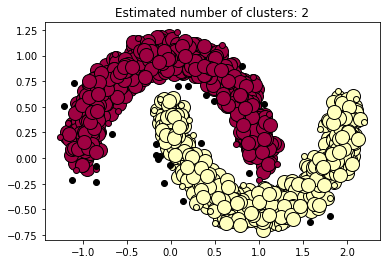

In [4]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_moons = make_moons(n_samples=n_samples, noise=.1)
X, labels_true = noisy_moons

db = DBSCAN(eps=0.1).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("Calinski-Harabaz Coefficient: %0.3f"
      % metrics.calinski_harabaz_score(X, labels))
print("CDbw score (comb): %0.3f"
      % CDbw(X, labels, alg_noise='comb'))
print("S_Dbw score (bind): %0.3f"
      % CDbw(X, labels, alg_noise='bind'))
print("CDbw score (sep): %0.3f"
      % CDbw(X, labels, alg_noise='sep'))
print("CDbw score (filter) : %0.3f"
      % CDbw(X, labels, alg_noise='filter'))

# #############################################################################
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt


Estimated number of clusters: 2
Homogeneity: 0.205
Completeness: 0.205
V-measure: 0.205
Adjusted Rand Index: 0.270
Adjusted Mutual Information: 0.205
Silhouette Coefficient: 0.488
Calinski-Harabaz Coefficient: 2192.287
0.45802832740636207
CDbw score: 0.008


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

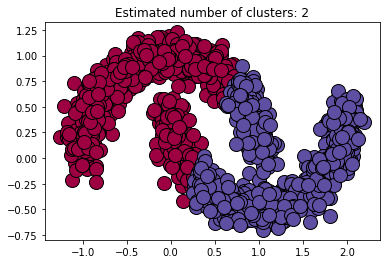

In [5]:
kmeans = KMeans(n_clusters=2).fit(X)
labels = kmeans.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels))
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("Calinski-Harabaz Coefficient: %0.3f"
      % metrics.calinski_harabaz_score(X, labels))
print("CDbw score: %0.3f"
      % CDbw(X, labels))

# #############################################################################
# Plot result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt

Estimated number of clusters: 3
Homogeneity: 0.997
Completeness: 0.975
V-measure: 0.986
Adjusted Rand Index: 0.993
Adjusted Mutual Information: 0.975
Silhouette Coefficient: 0.388
Calinski-Harabaz Coefficient: 737.835
0.935885662744699
CDbw score (comb): 0.112
0.34606447542273305
CDbw score (bind): 0.176
0.3379922127351913
CDbw score (sep): 0.170
0.3379922127351913
CDbw score (filter) : 0.170


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

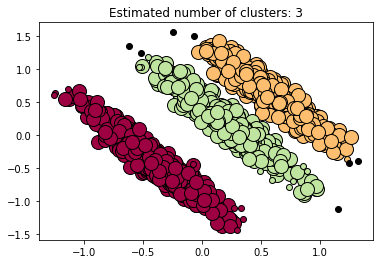

In [6]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============


centers = [[1, 1], [-2, -2], [3, 3]]
X, labels_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.4,
                            random_state=0)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

db = DBSCAN(eps=0.14).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("Calinski-Harabaz Coefficient: %0.3f"
      % metrics.calinski_harabaz_score(X, labels))
print("CDbw score (comb): %0.3f"
      % CDbw(X, labels, alg_noise='comb'))
print("CDbw score (bind): %0.3f"
      % CDbw(X, labels, alg_noise='bind'))
print("CDbw score (sep): %0.3f"
      % CDbw(X, labels, alg_noise='sep'))
print("CDbw score (filter) : %0.3f"
      % CDbw(X, labels, alg_noise='filter'))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt

Estimated number of clusters: 3
Homogeneity: 0.580
Completeness: 0.580
V-measure: 0.580
Adjusted Rand Index: 0.506
Adjusted Mutual Information: 0.580
Silhouette Coefficient: 0.432
Calinski-Harabaz Coefficient: 1526.447


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.7506746644117348 0.5647581076831628 0.11263741023390908 0.047752585346980514
CDbw score: 0.048


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

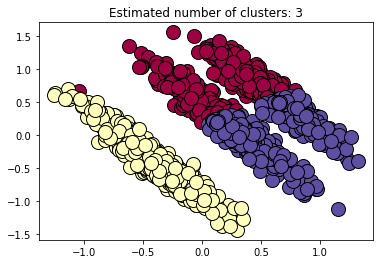

In [7]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
# #############################################################################
# Compute KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels))
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("Calinski-Harabaz Coefficient: %0.3f"
      % metrics.calinski_harabaz_score(X, labels))
print("CDbw score: %0.3f"
      % CDbw(X, labels))

# #############################################################################
# Plot result

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt